# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import sys
import string
import re
sys.path.append('../')

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
# import WordCloud
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [5]:
# df = pd.read_csv('../data/external/sentiment_140.csv', names=['polarity', 'id', 'date', 'query', 'user', 'text'],encoding= 'latin-1')

In [4]:
df = pd.read_csv('../data/external/training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", names=["sentiment", "ids", "date", "flag", "user", "text"])

In [5]:
columns = list(df.columns)
columns

['sentiment', 'ids', 'date', 'flag', 'user', 'text']

Remove HTML Tags, URL(including image urls), Mentions and Hashtags

In [6]:
def to_lower(df, columns = ['text']):
    for col in columns:
        df[col] = df[col].str.lower()
    return df

In [7]:
def replace_emojis(df, columns= ['text']):
    emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
    for col in columns:
        for emoji in emojis.keys():
                df['text'] = df['text'].replace(emoji, "EMOJI" + emojis[emoji])
    return df

In [8]:
def filter_html_tags(df, columns = ['text']):
    for col in columns:
        df[col] = df[col].apply(lambda x: re.split('<.*?>','' ,str(x)))
    return df

In [9]:
def filter_url(df, columns = ['text']):
    for col in columns:
        df[col] = df[col].apply(lambda x: re.sub(r'https?://\S+|www\.\S+| http?://\S+','', str(x)))
    return df

In [10]:
def filter_mentions_hashtags(df, columns = ['text']):
    for col in columns:
        df[col] = df[col].apply(lambda x: re.sub(r'\@\S+|\#', '', str(x)))
    return df

In [11]:
def lemmatization(df, columns = ['text']):
    lemmatizer = WordNetLemmatizer()
    for col in columns:
        df[col] = df[col].apply(lambda x: [lemmatizer.lemmatize(str(val)) for val in x])
    return df


In [12]:
def stemming(df, columns = ['text']):
    pstemmer = PorterStemmer()
    for col in columns:
        # df[col] = df[col].apply(lambda x: " ".join(nltk.PorterStemmer().stem(str(text)) for text in x.split()))
        df[col] = df[col].apply(lambda word_list: [pstemmer.stem(x) for x in word_list])
    return df

In [13]:
def filter_stopwords(df, columns = ['text']):
    stop_words = set(stopwords.words('english'))
    for col in columns:
        df[col] = df[col].apply(lambda x: ' '.join(x for x in str(x).split() if x not in stop_words))
    return df

In [14]:
def remove_punctuation(df, columns = ['text']):
    for col in columns:
        df[col] = df[col].str.translate(str.maketrans('', '', string.punctuation))
    return df


In [15]:
from nltk.tokenize import word_tokenize, TweetTokenizer
def make_tokens(df, columns = ['text']):
    tt = TweetTokenizer()
    for col in columns:
        df[col] = df[col].apply(tt.tokenize)
    return df

In [16]:
def preprocess(df, columns = ['text']):
    df = to_lower(df)
    # df = 
    # df = replace_emojis(df, columns)
    df = filter_url(df, columns= columns)
    df = filter_mentions_hashtags(df, columns= columns)
    df = remove_punctuation(df, columns= columns)
    df = filter_stopwords(df, columns= columns)
    print("Tokenization")
    df = make_tokens(df, columns = columns)
    print("stemming")
    df = stemming(df, columns= columns)
    print("lemmatize")
    df = lemmatization(df,columns= columns)

    return df

In [17]:
df3 = df.copy()
df = preprocess(df)
# Processing time : ~14 mins(PC)

Tokenization
stemming
lemmatize


In [18]:
df.text.isna().sum()

0

In [19]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"[awww, that, bummer, shoulda, got, david, carr..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,"[upset, cant, updat, facebook, text, might, cr..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,"[dive, mani, time, ball, manag, save, 50, rest..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,"[whole, bodi, feel, itchi, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"[behav, im, mad, cant, see]"


In [20]:
# data_neg = df[df['polarity'] == 0]
# plt.figure(figsize = (20,20))
# wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
#                collocations=False).generate(" ".join(data_neg))
# plt.imshow(wc)

Join the Final outcome

In [21]:

df['text'] = df['text'].apply(lambda x: ' '.join(x))

In [22]:
df.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww that bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dive mani time ball manag save 50 rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behav im mad cant see


In [23]:
# df[['text', 'sentiment']].to_csv('../data/processed/selected_features_text_final.csv')

In [24]:
df['text'].head()

0    awww that bummer shoulda got david carr third day
1    upset cant updat facebook text might cri resul...
2      dive mani time ball manag save 50 rest go bound
3                      whole bodi feel itchi like fire
4                                behav im mad cant see
Name: text, dtype: object

In [25]:
df2['text'].head()

NameError: name 'df2' is not defined

In [ ]:
X = df['text']
y = df['sentiment']
type(X)

pandas.core.series.Series

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [ ]:
tf = TfidfVectorizer(ngram_range= (1,2), max_features = 500000)
X_train = tf.fit_transform(X_train)
X_test = tf.transform(X_test)

In [ ]:
pickle.dump(tf, open('../models/tf_notebook.pkl', 'wb'))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
lr = LogisticRegression(max_iter = 20000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# accuracy is ~79%


In [ ]:
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

0.7957458333333334


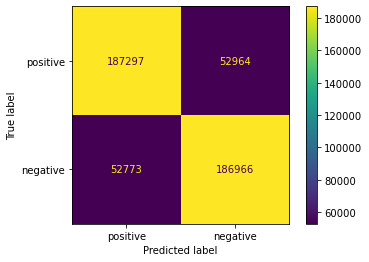

In [58]:
print(acc)
mat = ConfusionMatrixDisplay(conf_matrix, display_labels=['positive', 'negative'])
mat.plot()

In [55]:
pickle.dump(lr, open('../models/79_57_logreg_final.pkl', 'wb'))

In [44]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [46]:
pickle.dump(mnb, open('../models/79_55-mnb_final.pkl', 'wb'))

0.7957458333333334


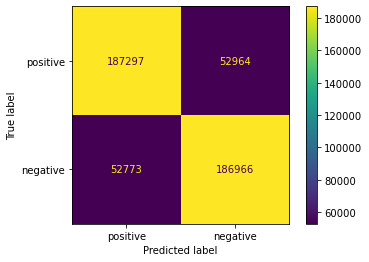

In [45]:
y_pred_mnb = mnb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
mat = ConfusionMatrixDisplay(conf_matrix, display_labels=['positive', 'negative'])
mat.plot()

In [ ]:
test_data = pd.DataFrame()

In [1]:
# print(X_test[0:10], lr.predict(X_test[0:10]),y_test[0:10])